# Análise de Dados usando Python e Jupyter

### Descrição: este notbook tem como objetivo apresentar resultados de uma analise de dados sobre Comunicação de Acidente de Trabalho, em que os dados foram extraidos do site do Instituto Nacional do Seguro Social-INSS, os dados a serem analisados são de Abril 2023.

##### Primeiramente importamos as bibliotecas: numpy, matplotlib com o módulo .pyplot

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Para a interação com os dados é preciso importar as bibliotecas request(para trazer os dados da web) e a pandas para processar os dados

In [15]:
import pandas as pd 
import requests

##### Após a realização do download dos dados, o arquivo CSV gerado é lido.

In [3]:
tabela = pd.read_csv("D.SDA.PDA.005.CAT.202304.csv", delimiter=';', encoding='latin1')
tabela.loc[0]

Agente  Causador  Acidente     Metal - Inclui Liga Ferrosa e nao Ferrosa, Tu
Data Acidente                                                        2023/03
CBO                            784205-Alimentador de Linha de Prod.         
CID-10                         M25.5 Dor Articular                          
CNAE2.0 Empregador                                                      1012
CNAE2.0 Empregador.1           Abate de Suinos, Aves e Outros Pequenos Anima
Emitente CAT                                             Empregador         
Espécie do benefício           Pa                                           
Filiação Segurado              Empregado                                    
Indica Óbito Acidente                                                    Não
Munic Empr                         412800-Ubiratã                           
Natureza da Lesão              Luxacao                                      
Origem de Cadastramento CAT                                         Internet

##### Foi utilizado como delimitador ';' pois o arquivo está separado por ; e usei outra codificação devido a codec patrão UTF-8 não reconhece alguns caracteres.
##### A segunda função exibe apenas os dados da primeira linha utilizei ela de referência para analisar outros dados.

### Analisando os dados

##### Após observar os dados disponíveis, são retirados os considerados mais importantes e usados para comparação.

#### SEXO: 

Sexo
Masculino        30203
Feminino         16421
Não Informado      375
Name: count, dtype: int64


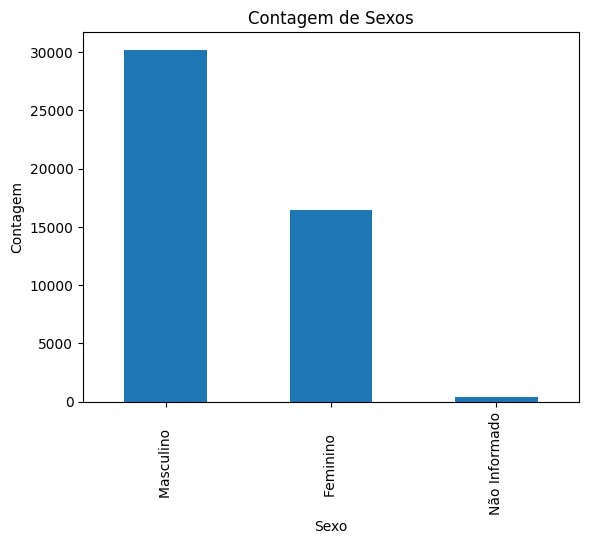

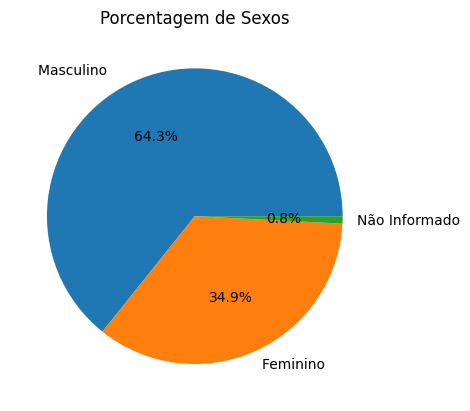

In [4]:
import matplotlib.pyplot as plt
contagem_sexos = tabela['Sexo'].value_counts()
print(contagem_sexos)
contagem_sexos.plot(kind='bar')
plt.title('Contagem de Sexos')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

porcentagens = contagem_sexos / contagem_sexos.sum() * 100
plt.pie(porcentagens, labels=porcentagens.index, autopct='%1.1f%%')
plt.title('Porcentagem de Sexos')
plt.show()

##### Com a quantidade de acidentados de cada sexo, vendo no gráfico conclui-se:
##### Temos que a maioria são homens representando 64.3% da porcentagem de acidentados em detrimento do sexo feminino que representa 34.9% dos acidentados. Tendo a conclusão que a maioria dos acidentados são homens.

### Agente  Causador  Acidente 

Agente  Causador  Acidente
Impacto de Pes. Contra Objeto em Movimento       2813
{ñ class}                                        2312
Motocicleta, Motoneta                            2198
Impacto de Pes. Contra Objeto Parado             1992
Impacto Sofrido por Pes. de Objeto Que Cai       1735
Queda de Pes. com Dif. de Nivel de Vei           1514
Veiculo, Nic                                     1453
Rua e Estrada - Superficie Utilizada para Sus    1392
Chao - Superficie Utilizada para Sustentar Pe    1308
Veiculo Rodoviario Motorizado                    1292
Metal - Inclui Liga Ferrosa e nao Ferrosa, Tu    1281
Faca, Facao- Ferramenta Manual sem Forca Motr    1190
Queda de Pes. em Mesmo Nivel, Nic                1047
Impacto Sofrido por Pes., Nic                    1015
Escada Permanente Cujos Degraus Permitem Apoi     798
Impacto Sofrido por Pes. de Objeto Projetad       790
Maquina, Nic                                      737
Calcada ou Caminho para Pedestre - Superficie     651
A

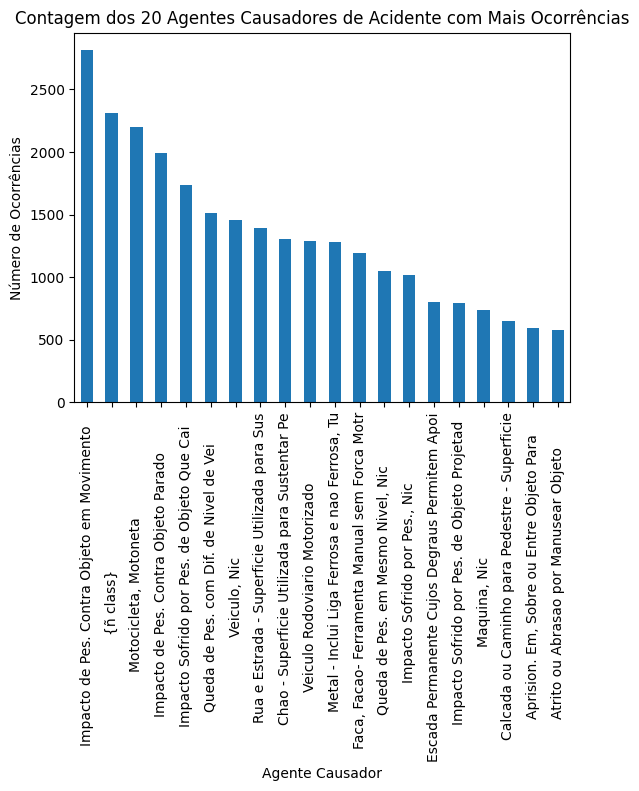

In [16]:
contagem_acidente = tabela['Agente  Causador  Acidente'].value_counts().nlargest(40)
print(contagem_acidente)

contagem_agentes_top20 = tabela['Agente  Causador  Acidente'].value_counts().nlargest(20)

contagem_agentes_top20.plot(kind='bar')
plt.title('Contagem dos 20 Agentes Causadores de Acidente com Mais Ocorrências')
plt.xlabel('Agente Causador')
plt.ylabel('Número de Ocorrências')
plt.show()


##### Observa-se que a maior causa de acidentes são impactos contra objetos em movimento e parados, e tem-se em segundo lugar acidentes não classificados, tomando uma grande parte da estatística.

### Relação entre Sexo e Tipo de acidente

Sexo              Feminino       Masculino      Não Informado
Tipo do Acidente                                             
Doença                      668            476              4
Trajeto                    4483           6397             89
Típico                    11270          23330            282


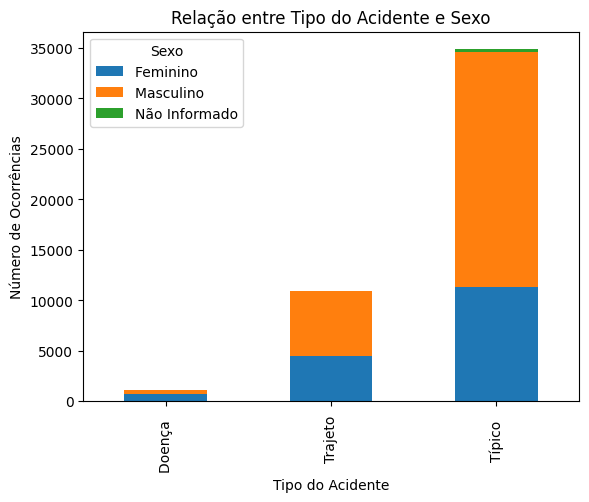

In [17]:
relacao_tipo_acidente_sexo = pd.crosstab(tabela['Tipo do Acidente'], tabela['Sexo'])

print(relacao_tipo_acidente_sexo)

relacao_tipo_acidente_sexo.plot(kind='bar', stacked=True)
plt.title('Relação entre Tipo do Acidente e Sexo')
plt.xlabel('Tipo do Acidente')
plt.ylabel('Número de Ocorrências')
plt.show()


##### Tendo o gráfico como base, mostra-se que em todos os demográficos, a maioria de acidentados são do sexo masculino, sendo que o do tipo Típico a quantidade de homens é mais que o dobro que de mulheres.
##### Além disso observa-se que os dados de doença são muito baixos comparados aos outros, isso mostra que um sistema de saúde se mostra eficaz, mas para uma comparação ao longo do tempo precisam ser avaliados os dados passados para comparação.

### Idade média em relação ao tipo de acidente

  Tipo do Acidente  Idade Média
0           Doença           45
1          Trajeto           35
2           Típico           40


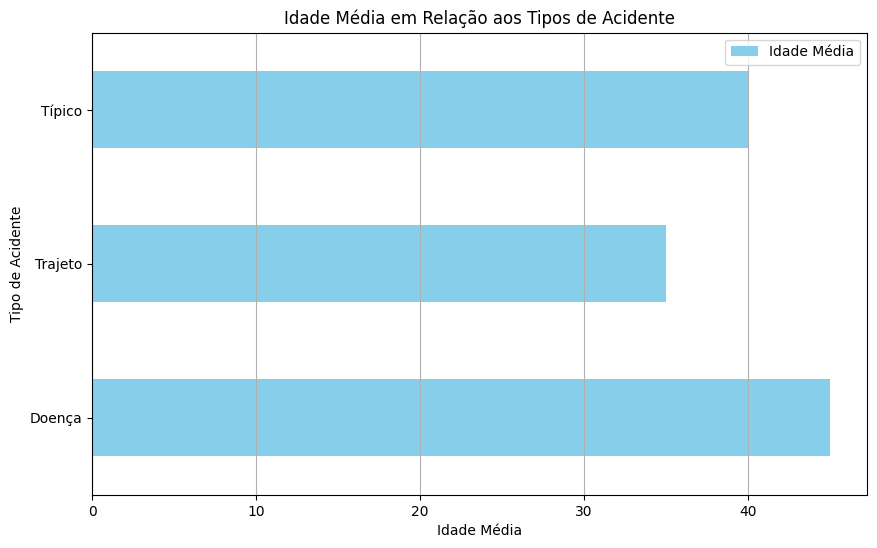

In [18]:
data = pd.DataFrame({
    'Tipo do Acidente': ['Doença', 'Trajeto', 'Típico'],
    'Idade Média': [45, 35, 40],
})
print(data)
data.set_index('Tipo do Acidente', inplace=True)

data.plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.title('Idade Média em Relação aos Tipos de Acidente')
plt.xlabel('Idade Média')
plt.ylabel('Tipo de Acidente')
plt.grid(axis='x')
plt.show()

##### Observa-se que a idade média dos acidentes por doença é maior, o que se explica pela maior fragilidade de saúde em pessoas mais velhas.
##### Já em relação a trajeto a média caiu 10 anos o que significa que muitas pessoas mais novas se envolvem em acidentes dessa natureza o que pode indicar impruência de pessoas mais novas, assim como outros resultados seria necessário uma analise mais profunda para tirar conclusões mais precisas.
##### Os acidentes do tipo Típico são o meio da idade média, pois geralmente estão ligados a fatores randômicos, em que a idade não interfere.

### Relação entre natureza da lesão e Parte do corpo atingida

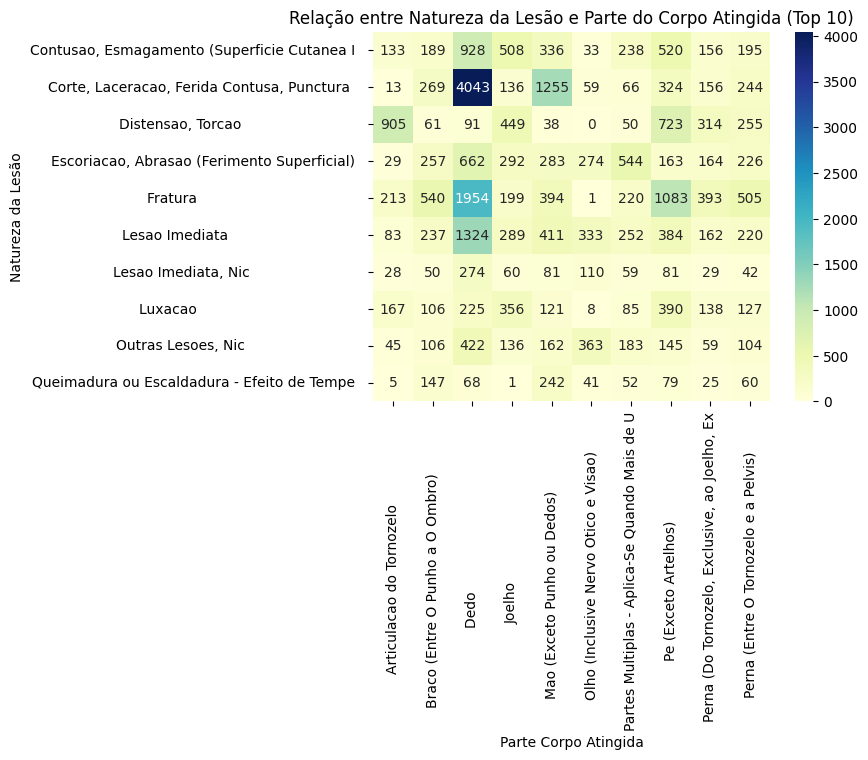

In [19]:
import seaborn as sns

top10_partes = tabela['Parte Corpo Atingida'].value_counts().nlargest(10).index

tabela_top10_partes = tabela[tabela['Parte Corpo Atingida'].isin(top10_partes)]

top10_lesoes = tabela['Natureza da Lesão'].value_counts().nlargest(10).index

tabela_top10_lesoes = tabela[tabela['Natureza da Lesão'].isin(top10_lesoes)]

relacao_lesao_parte_corpo = pd.crosstab(tabela_top10_lesoes['Natureza da Lesão'], tabela_top10_partes['Parte Corpo Atingida'])

sns.heatmap(relacao_lesao_parte_corpo, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Relação entre Natureza da Lesão e Parte do Corpo Atingida (Top 10)')
plt.xlabel('Parte Corpo Atingida')
plt.ylabel('Natureza da Lesão')
plt.show()


##### A maior quantidade de dados é apresentado de cortes e afins nos dedos, o que mostra que as mãos são grandes focos dessas estatísticas.
##### Outro ponto a se observar é que como vimos as principais partes do corpo afetadas temnos as principais lesões que são cortes, fraturas e lesões.
